* Insertions
* HG002 Only
* Technology: 10X

* The following classifier will train on and predict the following labels:
    - Exact Match: 1
    - Hom Ref: 0
    - Inaccurate Call: 2

In [31]:
"""
Imports
"""
import pandas as pd
import numpy as np
from fancyimpute import KNN
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import LeaveOneOut
from scipy.stats import ks_2samp
from scipy import stats
from matplotlib import pyplot
from sklearn import preprocessing
from scipy.linalg import svd
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA as sklearnPCA
import plotly.plotly as py
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import f1_score, precision_score
from sklearn import preprocessing
from ggplot import *
from bokeh.charts import TimeSeries
from bokeh.models import HoverTool
from bokeh.plotting import show
from bokeh.charts import Scatter, Histogram, output_file, show
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.charts import Bar, output_file, show
import bokeh.palettes as palettes
from bokeh.models import HoverTool, BoxSelectTool, Legend
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

In [32]:
# Import Training Data
# SVanalyzer generated training data
df_train = pd.read_csv('/Volumes/lesleydata/SVanalyzer_ML/Sept122017/Step3_ML/data/train/tech_sep/INS/TenX_HG002_INS.csv')
df_train_2 = pd.read_csv('/Volumes/lesleydata/SVanalyzer_ML/Sept122017/Step3_ML/data/train/tech_sep/INS/TenX_HG002_INS.csv')
df_train.rename(columns={'size': 'Size'}, inplace=True)
df_train.head(1)

,chrom,id,sample,start,end,type,SVtype,Size,refN_cnt,refN_pct,...,TenX.HP2_amb_reason_orientation_orientation,TenX.HP2_amb_reason_same_scores,TenX.HP2_ref_alnScore_mean,TenX.HP2_ref_alnScore_std,TenX.HP2_ref_count,TenX.HP2_ref_insertSize_mean,TenX.HP2_ref_insertSize_std,TenX.HP2_ref_reason_alignmentScore,TenX.HP2_ref_reason_insertSizeScore,TenX.HP2_ref_reason_orientation
0,1,1,HG002,1925143,1925144,Insertion,Insertion,147,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Import Test Data
# SVanalyzer generated training data
df_test = pd.read_csv('/Volumes/lesleydata/SVanalyzer_ML/Sept122017/Step3_ML/data/test/tech_sep/INS/TenX_HG002_INS.csv')
df_test_2 = pd.read_csv('/Volumes/lesleydata/SVanalyzer_ML/Sept122017/Step3_ML/data/test/tech_sep/INS/TenX_HG002_INS.csv')
df_test.rename(columns={'size': 'Size'}, inplace=True)
df_test.head(1)

,chrom,id,sample,start,end,type,SVtype,Size,refN_cnt,refN_pct,...,TenX.HP2_amb_reason_orientation_orientation,TenX.HP2_amb_reason_same_scores,TenX.HP2_ref_alnScore_mean,TenX.HP2_ref_alnScore_std,TenX.HP2_ref_count,TenX.HP2_ref_insertSize_mean,TenX.HP2_ref_insertSize_std,TenX.HP2_ref_reason_alignmentScore,TenX.HP2_ref_reason_insertSizeScore,TenX.HP2_ref_reason_orientation
0,2,1,HG002,105840190,105840191,Insertion,Insertion,206,0,0,...,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# Store header names in lists and find names that are NOT contained in BOTH lists
c = list(df_train.columns.values)
d = list(df_test.columns.values)
set(c) - set(d)

{'Label'}

In [35]:
### Drop columns that are not shared by both dataframes
df_train.drop(['GTcons'], axis=1, inplace = True)
df_train.drop(['GTconflict'], axis=1, inplace = True)
df_train.drop(['GTsupp'], axis=1, inplace = True)
df_train.drop(['sample'], axis=1, inplace = True)
df_train.drop(['SVtype'], axis=1, inplace = True)
df_train.drop(['type'], axis=1, inplace = True)
df_train.drop(['id'], axis=1, inplace = True)

In [36]:
df_train.head(1)

,chrom,start,end,Size,refN_cnt,refN_pct,segdup_cnt,segdup_pct,tandemrep_cnt,tandemrep_pct,...,TenX.HP2_amb_reason_orientation_orientation,TenX.HP2_amb_reason_same_scores,TenX.HP2_ref_alnScore_mean,TenX.HP2_ref_alnScore_std,TenX.HP2_ref_count,TenX.HP2_ref_insertSize_mean,TenX.HP2_ref_insertSize_std,TenX.HP2_ref_reason_alignmentScore,TenX.HP2_ref_reason_insertSizeScore,TenX.HP2_ref_reason_orientation
0,1,1925143,1925144,147,0,0,0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df_train['chrom'].replace('X', 23, inplace=True)
df_train['chrom'].replace('Y', 24, inplace=True)
df_test['chrom'].replace('X', 23, inplace=True)
df_test['chrom'].replace('Y', 24, inplace=True)

In [38]:
# Store header names in lists and find names that are NOT contained in BOTH lists
c = list(df_train.columns.values)
d = list(df_test.columns.values)
set(d) - set(c)

{'GTconflict',
 'GTcons',
 'GTsupp',
 'SVtype',
 'TenX.HP1_amb_reason_alignmentScore_insertSizeScore',
 'TenX.HP1_amb_reason_orientation_insertSizeScore',
 'TenX.HP2_amb_reason_alignmentScore_insertSizeScore',
 'TenX.HP2_amb_reason_insertSizeScore_orientation',
 'TenX.HP2_amb_reason_orientation_insertSizeScore',
 'id',
 'sample',
 'type'}

In [39]:
### Drop columns that are not shared by both dataframes
df_test.drop(['TenX.HP1_amb_reason_alignmentScore_insertSizeScore'], axis=1, inplace = True)
df_test.drop(['TenX.HP1_amb_reason_orientation_insertSizeScore'], axis=1, inplace = True)
df_test.drop(['TenX.HP2_amb_reason_alignmentScore_insertSizeScore'], axis=1, inplace = True)
df_test.drop(['TenX.HP2_amb_reason_insertSizeScore_orientation'], axis=1, inplace = True)
df_test.drop(['TenX.HP2_amb_reason_orientation_insertSizeScore'], axis=1, inplace = True)
df_test.drop(['GTcons'], axis=1, inplace = True)
df_test.drop(['GTconflict'], axis=1, inplace = True)
df_test.drop(['GTsupp'], axis=1, inplace = True)
df_test.drop(['sample'], axis=1, inplace = True)
df_test.drop(['SVtype'], axis=1, inplace = True)
df_test.drop(['type'], axis=1, inplace = True)
df_test.drop(['id'], axis=1, inplace = True)

***
Impute missing values using KNN
***

In [40]:
# Store training data in a new variable which will be converted to a matrix
X = df_train
X.head(3)

,chrom,start,end,Size,refN_cnt,refN_pct,segdup_cnt,segdup_pct,tandemrep_cnt,tandemrep_pct,...,TenX.HP2_amb_reason_orientation_orientation,TenX.HP2_amb_reason_same_scores,TenX.HP2_ref_alnScore_mean,TenX.HP2_ref_alnScore_std,TenX.HP2_ref_count,TenX.HP2_ref_insertSize_mean,TenX.HP2_ref_insertSize_std,TenX.HP2_ref_reason_alignmentScore,TenX.HP2_ref_reason_insertSizeScore,TenX.HP2_ref_reason_orientation
0,1,1925143,1925144,147,0,0,0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2263422,2263423,34,0,0,0,0.0,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2779748,2779749,48,0,0,0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# Convert dataframe to matrix
X=X.as_matrix()

#Imput missing values from three closest observations
X_imputed=KNN(k=3).complete(X)
X=pd.DataFrame(X_imputed)

Imputing row 1/5970 with 59 missing, elapsed time: 17.820
Imputing row 101/5970 with 59 missing, elapsed time: 17.961
Imputing row 201/5970 with 59 missing, elapsed time: 18.091
Imputing row 301/5970 with 0 missing, elapsed time: 18.254
Imputing row 401/5970 with 0 missing, elapsed time: 18.385
Imputing row 501/5970 with 0 missing, elapsed time: 18.535
Imputing row 601/5970 with 59 missing, elapsed time: 18.698
Imputing row 701/5970 with 59 missing, elapsed time: 18.840
Imputing row 801/5970 with 59 missing, elapsed time: 18.970
Imputing row 901/5970 with 59 missing, elapsed time: 19.125
Imputing row 1001/5970 with 0 missing, elapsed time: 19.279
Imputing row 1101/5970 with 0 missing, elapsed time: 19.449
Imputing row 1201/5970 with 0 missing, elapsed time: 19.613
Imputing row 1301/5970 with 0 missing, elapsed time: 19.766
Imputing row 1401/5970 with 59 missing, elapsed time: 19.923
Imputing row 1501/5970 with 59 missing, elapsed time: 20.084
Imputing row 1601/5970 with 59 missing, ela

In [42]:
# Store header values in a list, will be used later to re-label the matrix post KNN imputation
dftrain_header = list(df_train.columns.values)
X.columns = dftrain_header
X.head(3)

,chrom,start,end,Size,refN_cnt,refN_pct,segdup_cnt,segdup_pct,tandemrep_cnt,tandemrep_pct,...,TenX.HP2_amb_reason_orientation_orientation,TenX.HP2_amb_reason_same_scores,TenX.HP2_ref_alnScore_mean,TenX.HP2_ref_alnScore_std,TenX.HP2_ref_count,TenX.HP2_ref_insertSize_mean,TenX.HP2_ref_insertSize_std,TenX.HP2_ref_reason_alignmentScore,TenX.HP2_ref_reason_insertSizeScore,TenX.HP2_ref_reason_orientation
0,1.0,1925143.0,1925144.0,147.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.000000,3.0,523.000000,0.000000,1.0,195.000000,0.000000,1.0,0.0,0.0
1,1.0,2263422.0,2263423.0,34.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.000000,0.0,538.000000,15.275252,6.0,279.666667,76.310040,5.0,1.0,0.0
2,1.0,2779748.0,2779749.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,...,408.000009,0.0,540.363648,19.018043,22.0,349.772735,126.850642,22.0,0.0,0.0


In [43]:
# Store Labels in a new 'Y' DataFrame
Y = pd.DataFrame()
Y['Label'] = X['Label']

In [44]:
#Count the number of labels
pd.value_counts(Y['Label'].values, sort=False)

1.0    1993
0.0    1993
2.0    1984
dtype: int64

In [45]:
# Note: originally selected 1000 of each label --> find out why some are lost

In [46]:
# Remove labels from feature set
X.drop(['Label'],axis=1, inplace = True)

In [47]:
# Order features
X4 = X.reindex_axis(sorted(X.columns), axis=1)

***
Machine Learning
***

** Train RF Classifier **

In [48]:
# Train Test Split
# Train on 70% of the data and test on 30%
X_train, X_test, y_train, y_test = train_test_split(X4, Y, test_size=0.3, random_state=0)

In [49]:
# Train Random Forest Classifier
model = RandomForestClassifier() 
model.fit(X_train, y_train)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/ipykernel/__main__.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning:

sort is deprecated, use sort_values(inplace=True) for INPLACE sorting



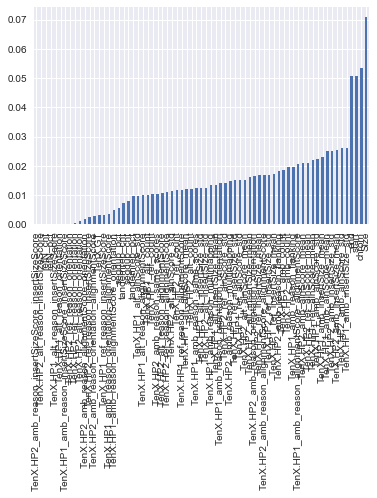

In [50]:
# Feature Importance
%matplotlib inline
feature_importances = pd.Series(model.feature_importances_, index=X_test.columns)
feature_importances.sort()
feature_importances.plot.bar()

In [27]:
#NOTE: Training Set - Show number of Hom Ref, Hom Var, Het Var datapoints the model was trained on
ytrain = pd.DataFrame()
ytrain['ytrain'] = y_train
pd.value_counts(ytrain['ytrain'].values, sort=False)

1.0    1397
0.0    1370
2.0     131
dtype: int64

In [28]:
model.predict(X_test)

array([ 2.,  2.,  0., ...,  2.,  1.,  1.])

In [29]:
pred = model.predict(X_test)

In [30]:
precision_score(pred, y_test, average='micro') 

0.13121161362367392

In [63]:
# Add original labels and predicted labels back to the original dataframe
df_Xtest = pd.DataFrame(X_test)
df_Xtest.head()

,Size,TenX.GT,TenX.HP1_alt_alnScore_mean,TenX.HP1_alt_alnScore_std,TenX.HP1_alt_count,TenX.HP1_alt_insertSize_mean,TenX.HP1_alt_insertSize_std,TenX.HP1_alt_reason_alignmentScore,TenX.HP1_alt_reason_insertSizeScore,TenX.HP1_alt_reason_orientation,...,TenX.HP2_ref_reason_orientation,chrom,end,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
1980,-41.0,0.0,0.000000,0.00000,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0.0,4.0,38598858.0,0.0,0.0,0.0,0.0,38598817.0,1.0,0.073171
2078,-475.0,0.0,0.000000,0.00000,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0.0,5.0,179065925.0,0.0,0.0,0.0,0.0,179065450.0,2.0,0.080000
9,-20.0,-1.0,517.466667,24.21533,15.0,329.733333,74.32852,15.0,0.0,0.0,...,0.0,1.0,24220960.0,0.0,0.0,0.0,0.0,24220939.0,1.0,1.000000
1117,-22.0,-1.0,0.000000,0.00000,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0.0,4.0,187058131.0,0.0,0.0,0.0,0.0,187058108.0,1.0,1.000000
195,-232.0,0.0,0.000000,0.00000,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0.0,15.0,71991778.0,0.0,0.0,0.0,0.0,71991545.0,2.0,0.197425


In [64]:
labels = pd.DataFrame(y_test)

In [65]:
df_Xtest['predicted_label'] = pred
df_Xtest['Label'] = df_train['Label']
df_Xtest['chrom'] = df_train['chrom']
df_Xtest['start'] = df_train['start']
df_Xtest['end'] = df_train['end']
# df_Xtest['Y_test'] = labels

In [66]:
pd.value_counts(df_Xtest['Label'].values, sort=False)

0    216
1    197
2    289
dtype: int64

In [67]:
pd.value_counts(df_Xtest['predicted_label'].values, sort=False)

0.0    224
2.0    263
1.0    215
dtype: int64

In [68]:
from sklearn.metrics import confusion_matrix
ytest = df_Xtest['Label']
predict = df_Xtest['predicted_label']
print(confusion_matrix(ytest, predict))

[[160  21  35]
 [  8 161  28]
 [ 56  33 200]]


In [69]:
pd.crosstab(ytest, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,2.0,All
True,,,,
0,160,21,35,216
1,8,161,28,197
2,56,33,200,289
All,224,215,263,702


In [70]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predict))

             precision    recall  f1-score   support

          0       0.71      0.74      0.73       216
          1       0.75      0.82      0.78       197
          2       0.76      0.69      0.72       289

avg / total       0.74      0.74      0.74       702



***
Predict
***

** Load Data **

In [71]:
X2 = df_test

** Impute missing values using KNN **

In [72]:
#Convert dataframe to matrix
X2=X2.as_matrix()

#Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

Imputing row 1/2340 with 8 missing, elapsed time: 2.539
Imputing row 101/2340 with 8 missing, elapsed time: 2.570
Imputing row 201/2340 with 8 missing, elapsed time: 2.600
Imputing row 301/2340 with 8 missing, elapsed time: 2.631
Imputing row 401/2340 with 8 missing, elapsed time: 2.665
Imputing row 501/2340 with 8 missing, elapsed time: 2.697
Imputing row 601/2340 with 8 missing, elapsed time: 2.729
Imputing row 701/2340 with 8 missing, elapsed time: 2.787
Imputing row 801/2340 with 8 missing, elapsed time: 2.819
Imputing row 901/2340 with 8 missing, elapsed time: 2.850
Imputing row 1001/2340 with 8 missing, elapsed time: 2.885
Imputing row 1101/2340 with 8 missing, elapsed time: 2.923
Imputing row 1201/2340 with 8 missing, elapsed time: 2.955
Imputing row 1301/2340 with 8 missing, elapsed time: 2.990
Imputing row 1401/2340 with 0 missing, elapsed time: 3.074
Imputing row 1501/2340 with 0 missing, elapsed time: 3.082
Imputing row 1601/2340 with 0 missing, elapsed time: 3.086
Imputing 

In [73]:
dftest_header = list(df_test.columns.values)
X2.columns = dftest_header
X2.head(3)

,chrom,start,end,Size,refN_cnt,refN_pct,segdup_cnt,segdup_pct,tandemrep_cnt,tandemrep_pct,...,TenX.HP2_amb_reason_orientation_orientation,TenX.HP2_amb_reason_same_scores,TenX.HP2_ref_alnScore_mean,TenX.HP2_ref_alnScore_std,TenX.HP2_ref_count,TenX.HP2_ref_insertSize_mean,TenX.HP2_ref_insertSize_std,TenX.HP2_ref_reason_alignmentScore,TenX.HP2_ref_reason_insertSizeScore,TenX.HP2_ref_reason_orientation
0,1.0,109690878.0,109690918.0,-39.0,0.0,0.0,0.0,0.000000,1.0,0.4,...,3.0,5.0,527.00000,0.000000,1.0,334.0000,0.000000,1.0,0.0,0.0
1,1.0,1869280.0,1869312.0,-31.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,7.0,5.0,539.59375,18.205184,32.0,353.8125,88.086051,32.0,0.0,0.0
2,1.0,2891239.0,2891284.0,-44.0,0.0,0.0,1.0,0.666667,1.0,1.0,...,1.0,1.0,0.00000,0.000000,0.0,0.0000,0.000000,0.0,0.0,0.0


In [74]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

,chrom,start,end,Size,refN_cnt,refN_pct,segdup_cnt,segdup_pct,tandemrep_cnt,tandemrep_pct,...,TenX.HP2_amb_reason_orientation_orientation,TenX.HP2_amb_reason_same_scores,TenX.HP2_ref_alnScore_mean,TenX.HP2_ref_alnScore_std,TenX.HP2_ref_count,TenX.HP2_ref_insertSize_mean,TenX.HP2_ref_insertSize_std,TenX.HP2_ref_reason_alignmentScore,TenX.HP2_ref_reason_insertSizeScore,TenX.HP2_ref_reason_orientation
0,1.0,109690878.0,109690918.0,-39.0,0.0,0.0,0.0,0.000000,1.0,0.4,...,3.0,5.0,527.00000,0.000000,1.0,334.0000,0.000000,1.0,0.0,0.0
1,1.0,1869280.0,1869312.0,-31.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,7.0,5.0,539.59375,18.205184,32.0,353.8125,88.086051,32.0,0.0,0.0
2,1.0,2891239.0,2891284.0,-44.0,0.0,0.0,1.0,0.666667,1.0,1.0,...,1.0,1.0,0.00000,0.000000,0.0,0.0000,0.000000,0.0,0.0,0.0


In [75]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

In [83]:
# c = list(X_train.columns.values)
# d = list(X5.columns.values)
# set(d) - set(c)

X5.drop(['Label'], axis=1, inplace = True)

In [84]:
model.predict(X5)

array([ 1.,  1.,  1., ...,  2.,  2.,  2.])

In [85]:
pred = model.predict(X5)

In [86]:
X5['predicted_label'] = pred
X5['chrom'] = df_test_2['chrom']
X5['start'] = df_test_2['start']
X5['end'] = df_test_2['end']
X5['Size'] = df_test_2['Size']
X5['GTcons'] = df_test_2['GTcons']
X5['GTsupp'] = df_test_2['GTsupp']

In [87]:
X5.head(3)

,Size,TenX.GT,TenX.HP1_alt_alnScore_mean,TenX.HP1_alt_alnScore_std,TenX.HP1_alt_count,TenX.HP1_alt_insertSize_mean,TenX.HP1_alt_insertSize_std,TenX.HP1_alt_reason_alignmentScore,TenX.HP1_alt_reason_insertSizeScore,TenX.HP1_alt_reason_orientation,...,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct,predicted_label,GTcons,GTsupp
0,-39,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,109690878,1.0,0.4,1.0,1,3
1,-31,1.0,537.473684,11.440318,19.0,335.578947,81.856946,19.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,1869280,0.0,0.0,1.0,1,4
2,-44,2.0,529.444444,18.006857,9.0,315.888889,63.729366,9.0,0.0,0.0,...,0.0,0.0,1.0,0.666667,2891239,1.0,1.0,1.0,1,1


***
Label Analysis
***

** Exact Match **

Note:
    No prediction score, f1 scores generated because there are no 'true' labels

In [88]:
em = X5['predicted_label'] == 1.0
exact_match = X5[em]

In [89]:
exact_match.head(1)

,Size,TenX.GT,TenX.HP1_alt_alnScore_mean,TenX.HP1_alt_alnScore_std,TenX.HP1_alt_count,TenX.HP1_alt_insertSize_mean,TenX.HP1_alt_insertSize_std,TenX.HP1_alt_reason_alignmentScore,TenX.HP1_alt_reason_insertSizeScore,TenX.HP1_alt_reason_orientation,...,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct,predicted_label,GTcons,GTsupp
0,-39,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,109690878,1.0,0.4,1.0,1,3


In [90]:
output_notebook()
p = figure()
p = Histogram(exact_match, values='GTcons', title='Exact_Match_HG002: Consensust GT', color='LightSlateGray', bins=15, plot_height=250, xlabel="GTcons", ylabel="Frequency")
show(p)

Loading BokehJS ...

** Homozygous Reference **

In [91]:
hr = X5['predicted_label'] == 0.0
hom_ref = X5[hr]
hom_ref.head(1)

,Size,TenX.GT,TenX.HP1_alt_alnScore_mean,TenX.HP1_alt_alnScore_std,TenX.HP1_alt_count,TenX.HP1_alt_insertSize_mean,TenX.HP1_alt_insertSize_std,TenX.HP1_alt_reason_alignmentScore,TenX.HP1_alt_reason_insertSizeScore,TenX.HP1_alt_reason_orientation,...,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct,predicted_label,GTcons,GTsupp
42,-72,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,206546249,1.0,1.0,0.0,-1,0


In [92]:
output_notebook()
p = figure()
p = Histogram(hom_ref, values='GTcons', title='Homozygous_Reference_HG002: Consensust GT', color='LightSlateGray', bins=15, plot_height=250, xlabel="GTcons", ylabel="Frequency")
show(p)

Loading BokehJS ...

** Inaccurate Call **

In [93]:
ic = X5['predicted_label'] == 2.0
inac_call = X5[ic]
inac_call.head(1)

,Size,TenX.GT,TenX.HP1_alt_alnScore_mean,TenX.HP1_alt_alnScore_std,TenX.HP1_alt_count,TenX.HP1_alt_insertSize_mean,TenX.HP1_alt_insertSize_std,TenX.HP1_alt_reason_alignmentScore,TenX.HP1_alt_reason_insertSizeScore,TenX.HP1_alt_reason_orientation,...,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct,predicted_label,GTcons,GTsupp
11,-93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,37165972,2.0,0.829787,2.0,1,3


In [94]:
output_notebook()
p = figure()
p = Histogram(inac_call, values='GTcons', title='Inaccurate_Call_HG002: Consensust GT', color='LightSlateGray', bins=15, plot_height=250, xlabel="GTcons", ylabel="Frequency")
show(p)

Loading BokehJS ...